In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Credit Card Customer Data.csv")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
df.fillna(0, inplace = True)

In [4]:
x = df.iloc[:,1:]

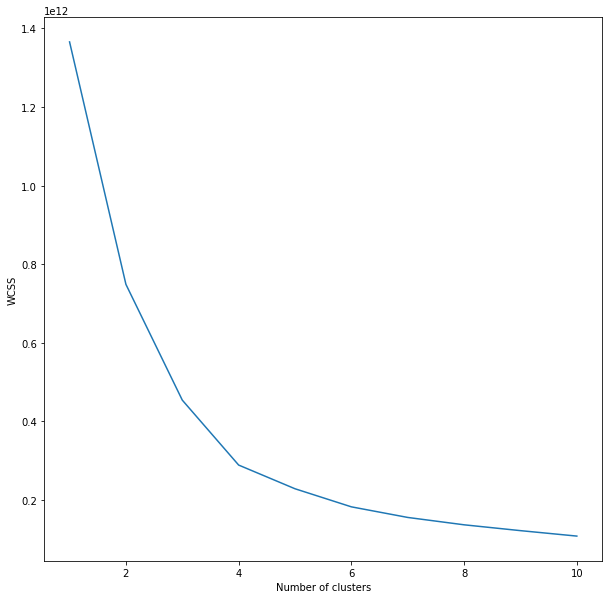

In [5]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(x)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
pca = PCA(2)
data = pca.fit_transform(x)

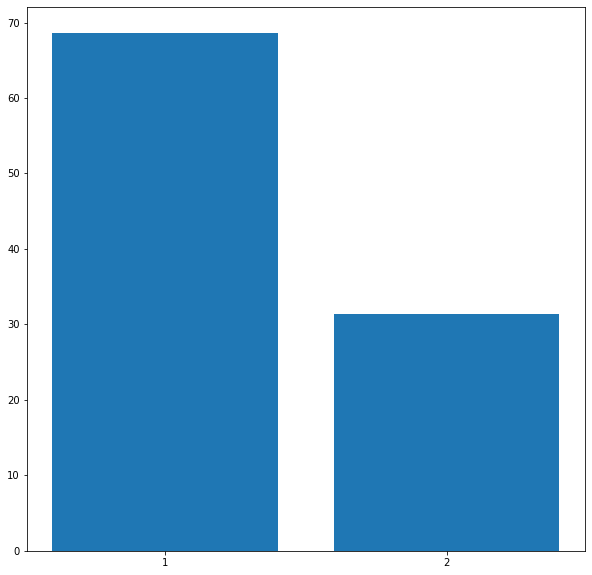

In [7]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

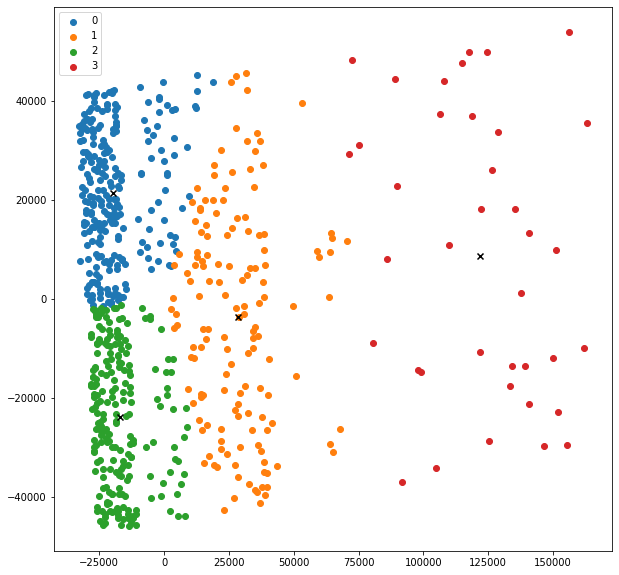

In [12]:
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 4, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [14]:
df['label'] = label

In [15]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,label
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,1


In [23]:
label_1 = df.query('label == 1')
label_2 = df.query('label == 2')
label_3 = df.query('label == 3')
label_4 = df.query('label == 0')

In [19]:
label_1.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,label
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,1
4,5,47437,100000,6,0,12,3,1
6,7,48370,100000,5,0,11,2,1
396,397,77954,73000,6,4,2,0,1
397,398,88207,49000,5,3,2,0,1
398,399,96929,67000,6,2,2,2,1
399,400,78618,61000,7,3,0,1,1
400,401,31551,75000,7,3,2,4,1
401,402,75792,48000,4,4,0,3,1


In [20]:
label_2.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,label
5,6,58634,20000,3,0,1,8,2
8,9,82490,5000,2,0,2,2,2
12,13,92503,11000,1,2,5,9,2
14,15,68517,6000,2,2,4,6,2
15,16,55196,8000,2,0,5,7,2
16,17,62617,15000,2,1,2,4,2
17,18,96463,8000,2,0,3,4,2
21,22,87241,16000,2,0,3,7,2
23,24,61061,9000,1,1,3,4,2
25,26,68067,18000,1,1,5,10,2


In [21]:
label_3.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,label
612,613,94391,157000,9,1,14,1,3
614,615,40019,163000,8,1,7,1,3
615,616,77910,131000,9,1,10,1,3
617,618,98216,136000,8,0,13,0,3
618,619,54495,121000,7,0,13,2,3
619,620,47650,158000,7,0,13,0,3
620,621,32107,108000,10,0,15,1,3
621,622,84192,166000,9,1,12,2,3
622,623,53916,176000,10,1,15,2,3
623,624,32584,166000,10,0,7,0,3


In [24]:
label_4.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,label
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
7,8,37376,15000,3,0,1,1,0
9,10,44770,3000,4,0,1,7,0
10,11,52741,10000,4,0,5,5,0
11,12,52326,13000,3,0,2,7,0
13,14,25084,9000,1,1,5,6,0
18,19,39137,11000,2,2,2,7,0
19,20,14309,19000,4,1,5,8,0
20,21,29794,5000,3,2,5,5,0


In [37]:
label_1.describe().iloc[1:3,:].round()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,label
mean,495.0,61313.0,62270.0,6.0,3.0,2.0,2.0,1.0
std,109.0,22030.0,14463.0,2.0,1.0,3.0,2.0,0.0


In [38]:
label_2.describe().iloc[1:3,:].round()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,label
mean,248.0,77356.0,15436.0,4.0,2.0,2.0,4.0,2.0
std,160.0,13661.0,8964.0,2.0,2.0,2.0,3.0,0.0


In [39]:
label_3.describe().iloc[1:3,:].round()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,label
mean,636.0,56288.0,155474.0,9.0,1.0,11.0,1.0,3.0
std,14.0,28969.0,25856.0,1.0,0.0,3.0,1.0,0.0


In [40]:
label_4.describe().iloc[1:3,:].round()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,label
mean,260.0,32133.0,16925.0,4.0,2.0,2.0,4.0,0.0
std,158.0,12703.0,11104.0,2.0,2.0,2.0,3.0,0.0


# Insights:
##Label 3 -> Very active user
##Label 1 -> Moderate user
##Label 4 -> little active user
##Label 2 -> very little active  user